<a href="https://colab.research.google.com/github/YoishD/Data-Science-B7/blob/main/YeshDakpU9proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

I found this data set from the UCI thing regarding abalone. I dont really know much about this species so I just gonna let the model do all the work. Honestly,  I dont feel to confident on my understanding of how it works completly so I just gonna let it run the first time without any input from my end using just the code used in the notes. I was planning on starting really simple and slowly build up complexity and slowly include more and more different predicotrs, but I really can not figure out how to add more predictors right now so I am just gonna model it after whole weight, as they two are most likely related.

In [ ]:
abb = pd.read_csv("https://raw.githubusercontent.com/YoishD/Data-Science-B7/refs/heads/main/abalone.csv").dropna()
#drops all the non-numerical columns
abb.drop(columns=["Sex"],inplace=True)
#IM unsure of what exactly effects shucked weight so Im just gonnn run it with everything

#convert to numpy array
s_matrix = abb.to_numpy()
#convert to a PyTorch tensor
s_tensor = torch.from_numpy(s_matrix)

s_tensor.shape


SxSt = torch.matmul(s_tensor,s_tensor.T)
SxSt,SxSt.shape


(tensor([[225.6966, 105.4182, 135.8586,  ..., 136.2635, 151.2282, 181.8702],
         [105.4182,  49.2688,  63.5087,  ...,  63.7073,  70.6938,  84.9995],
         [135.8586,  63.5087,  82.0638,  ...,  82.5815,  91.5315, 110.3546],
         ...,
         [136.2635,  63.7073,  82.5815,  ...,  83.4643,  92.3685, 111.7786],
         [151.2282,  70.6938,  91.5315,  ...,  92.3685, 102.2840, 123.6217],
         [181.8702,  84.9995, 110.3546,  ..., 111.7786, 123.6217, 149.9275]],
        dtype=torch.float64),
 torch.Size([4177, 4177]))

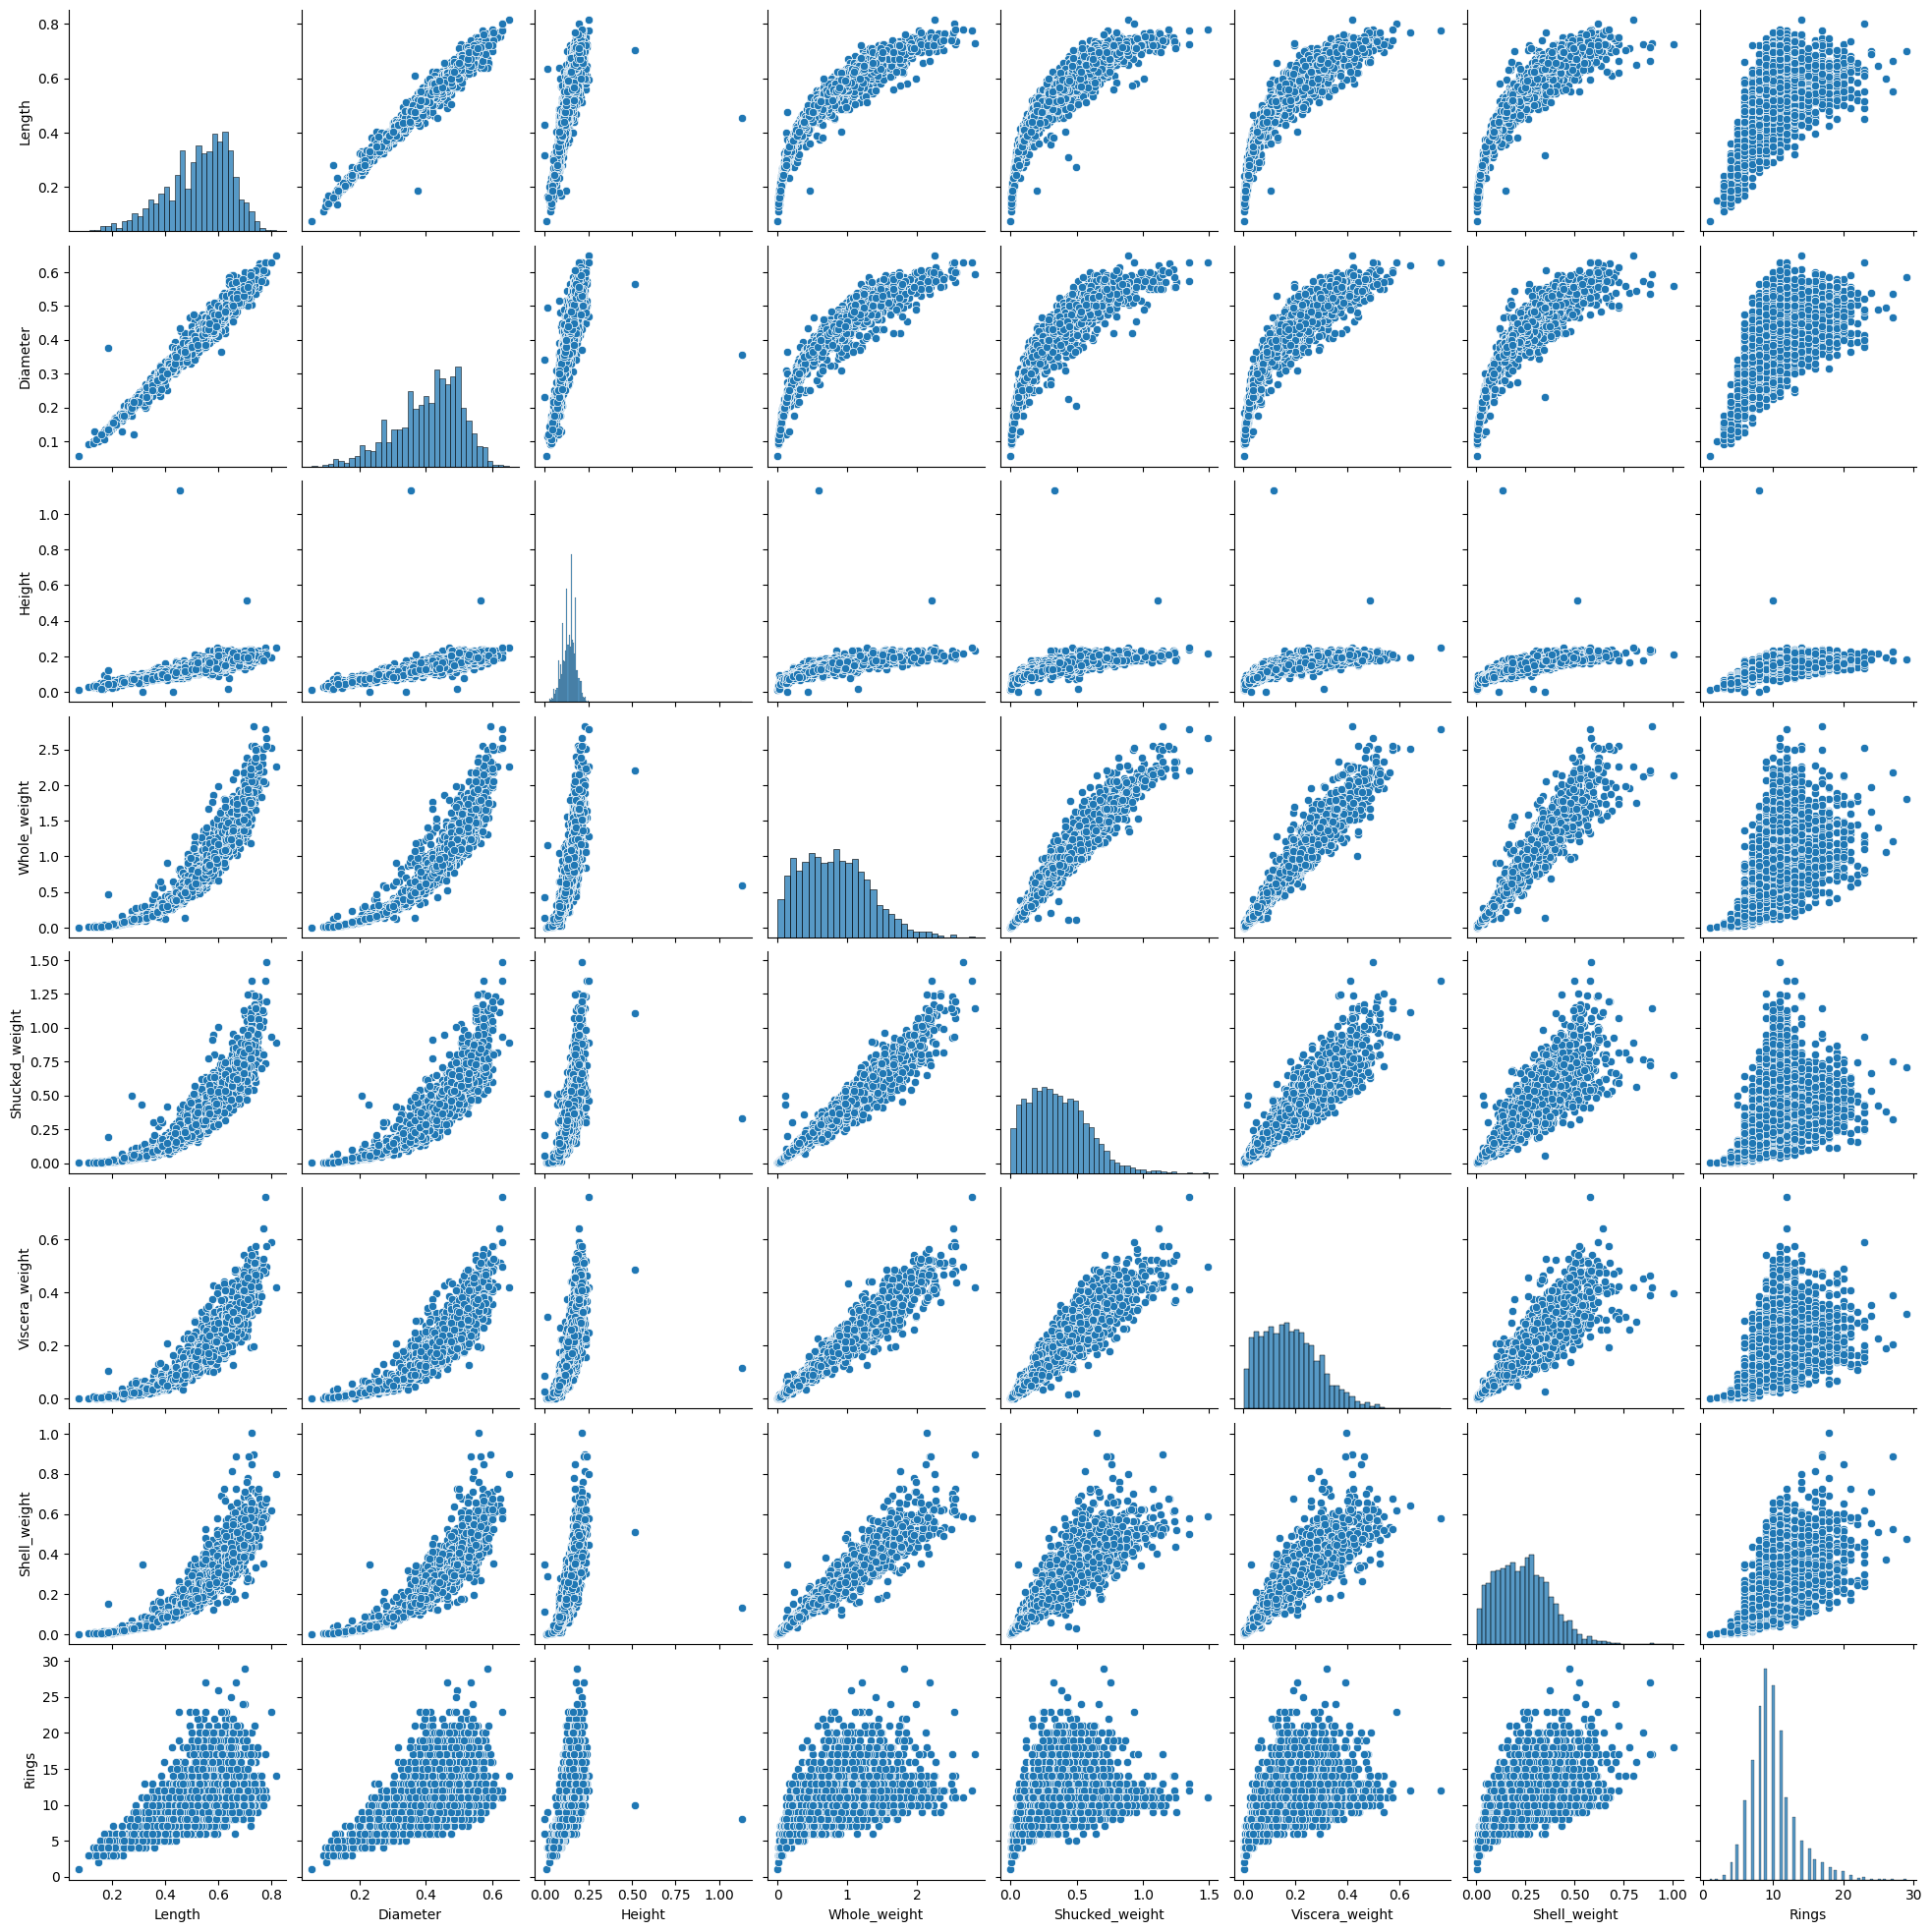

In [ ]:
sns.pairplot(abb)

mhm. Whole weight does indeed have a linear relation, and it looks like most of the other variables have some clear and strong relationship with weight with the exception of rings, where its just really varied at the end.

In [ ]:
linear = torch.nn.Linear(in_features=2, # input_features: column number of input
                         out_features=1,# out_features: column number of output
                         dtype=torch.float64) #specifies the data type

X = s_tensor[:,[3,4]] #u
y_pred = linear(X) #the actual matrix multiplication
print(f"Input shape: {X.shape}\n")
print(f"Output:\n{y_pred}\n\nOutput shape: {y_pred.shape}")

Input shape: torch.Size([4177, 2])

Output:
tensor([[-0.2766],
        [-0.1862],
        [-0.3282],
        ...,
        [-0.4837],
        [-0.4577],
        [-0.7246]], dtype=torch.float64, grad_fn=<AddmmBackward0>)

Output shape: torch.Size([4177, 1])


In [ ]:
X = s_tensor[:,[3]] #use Whole weight as a predictor
y = s_tensor[:,4].unsqueeze(dim=1) #Shucked weight is the estimand, the thing we're predicting.



# 80% of data is training, 20% is testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#this function defaults to a random  offset vector and weight matrix
linear = torch.nn.Linear(
    in_features=1, # in_features: must match number of columns of input, which is now one
    out_features=1,# out_features: number of columns in output
    dtype=torch.float64) #specifies the data type

In [ ]:
# Create a loss function
loss_fn = nn.MSELoss() # mean squared error; this is similar to multiplying our matrix by itself

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=linear.parameters(),
                            lr=0.1) #this is how fast it optimizes; smaller is slower, but more consistent



In [ ]:
# Set the number of epochs; this is how many times we update our model
epochs = 10
for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    linear.train()

    # 1. Forward pass; makes predictions
    y_pred = linear(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    linear.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = linear(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 1 == 0: #prints every 100 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75247, Test loss: 0.31467
Epoch: 1 | Train loss: 0.31585, Test loss: 0.13277
Epoch: 2 | Train loss: 0.13506, Test loss: 0.05815
Epoch: 3 | Train loss: 0.06013, Test loss: 0.02763
Epoch: 4 | Train loss: 0.02899, Test loss: 0.01519
Epoch: 5 | Train loss: 0.01599, Test loss: 0.01012
Epoch: 6 | Train loss: 0.01049, Test loss: 0.00803
Epoch: 7 | Train loss: 0.00810, Test loss: 0.00714
Epoch: 8 | Train loss: 0.00700, Test loss: 0.00671
Epoch: 9 | Train loss: 0.00645, Test loss: 0.00646


Nothing to out of the ordinary so far, my lost values are showing a negative trend so that means we are fitting to the data, lets move to actually graphing now.

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


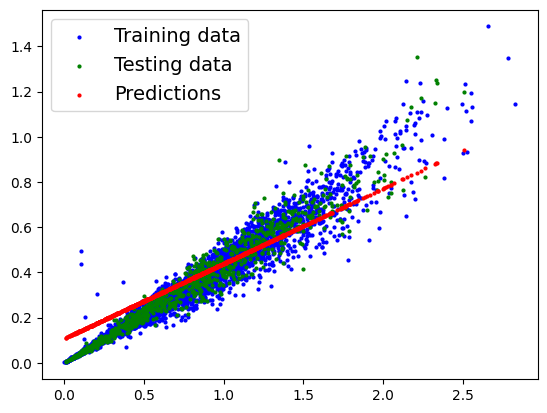

In [ ]:


# Turn on evaluation mode
linear.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = linear(X_test)

# Plot data and predictions
plot_predictions(predictions=y_preds);



Now to add more stuff! We have the general trend but we are not as steep as our actual data, and our predicted start is alot lower. Hopefully adding more  predictors will help correct this. I am right now going to keep our next predicot low impact so I am choosing shell weight for our next predicot which similarly showcased a positive linear relationship. so im not expected to much of a jump mostly just testing out adding mutliple predictors

In [ ]:
linear = torch.nn.Linear(in_features=3, # input_features: column number of input
                         out_features=1,# out_features: column number of output
                         dtype=torch.float64) #specifies the data type

X = s_tensor[:,[3,4,5]] #u
y_pred = linear(X) #the actual matrix multiplication
print(f"Input shape: {X.shape}\n")
print(f"Output:\n{y_pred}\n\nOutput shape: {y_pred.shape}")

Input shape: torch.Size([4177, 3])

Output:
tensor([[-0.2727],
        [-0.2396],
        [-0.2749],
        ...,
        [-0.3696],
        [-0.3776],
        [-0.4887]], dtype=torch.float64, grad_fn=<AddmmBackward0>)

Output shape: torch.Size([4177, 1])


In [ ]:
X = s_tensor[:,[3,5]] #use Whole weight + Visceral Weight as a predictor
y = s_tensor[:,4].unsqueeze(dim=1) #Shucked weight is the estimand, the thing we're predicting.



# 80% of data is training, 20% is testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#this function defaults to a random  offset vector and weight matrix
linear = torch.nn.Linear(
    in_features=2, # This part took a bit of trial and error because the parameters for the in features is actually different from this line compared to the one above, something that I didn't really understand until my code gave me an error due to my dim of my matrixes being out of order
    out_features=1,# out_features: number of columns in output
    dtype=torch.float64) #specifies the data type

In [ ]:
# Create a loss function
loss_fn = nn.MSELoss() # mean squared error; this is similar to multiplying our matrix by itself

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=linear.parameters(),
                            lr=0.1) #this is how fast it optimizes; smaller is slower, but more consistent



In [ ]:
# Set the number of epochs; this is how many times we update our model
epochs = 10
for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    linear.train()

    # 1. Forward pass; makes predictions
    y_pred = linear(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    linear.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = linear(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 1 == 0: #prints every 100 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.42098, Test loss: 0.22130
Epoch: 1 | Train loss: 0.23855, Test loss: 0.15394
Epoch: 2 | Train loss: 0.16232, Test loss: 0.12492
Epoch: 3 | Train loss: 0.12849, Test loss: 0.11079
Epoch: 4 | Train loss: 0.11171, Test loss: 0.10244
Epoch: 5 | Train loss: 0.10188, Test loss: 0.09636
Epoch: 6 | Train loss: 0.09499, Test loss: 0.09122
Epoch: 7 | Train loss: 0.08942, Test loss: 0.08654
Epoch: 8 | Train loss: 0.08453, Test loss: 0.08214
Epoch: 9 | Train loss: 0.08005, Test loss: 0.07796


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


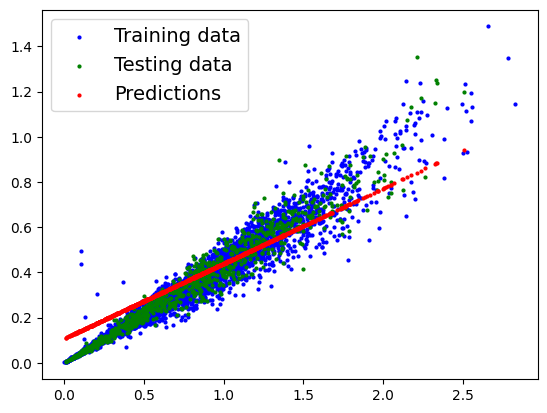

In [ ]:


# Turn on evaluation mode
linear.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = linear(X_test)

# Plot data and predictions
plot_predictions(predictions=y_preds);



okay nothing to out of the ordinary. The data looked similar so its not going to have that big of an impact. I am next going to add some catergorys that arent exactly linear.

In [ ]:
linear = torch.nn.Linear(in_features=4, # input_features: column number of input
                         out_features=1,# out_features: column number of output
                         dtype=torch.float64) #specifies the data type

X = s_tensor[:,[3,4,1,2]] #u
y_pred = linear(X) #the actual matrix multiplication
print(f"Input shape: {X.shape}\n")
print(f"Output:\n{y_pred}\n\nOutput shape: {y_pred.shape}")

Input shape: torch.Size([4177, 4])

Output:
tensor([[0.5767],
        [0.5289],
        [0.6277],
        ...,
        [0.6530],
        [0.6248],
        [0.6700]], dtype=torch.float64, grad_fn=<AddmmBackward0>)

Output shape: torch.Size([4177, 1])


In [ ]:
X = s_tensor[:,[1,2,3]] #use Whole weight as a predictor
y = s_tensor[:,4].unsqueeze(dim=1) #Shucked weight is the estimand, the thing we're predicting.



# 80% of data is training, 20% is testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#this function defaults to a random  offset vector and weight matrix
linear = torch.nn.Linear(
    in_features=3, # in_features: must match number of columns of input, which is now one
    out_features=1,# out_features: number of columns in output
    dtype=torch.float64) #specifies the data type

In [ ]:
# Create a loss function
loss_fn = nn.MSELoss() # mean squared error; this is similar to multiplying our matrix by itself

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=linear.parameters(),
                            lr=0.1) #this is how fast it optimizes; smaller is slower, but more consistent



In [ ]:
# Set the number of epochs; this is how many times we update our model
epochs = 10
for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    linear.train()

    # 1. Forward pass; makes predictions
    y_pred = linear(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    linear.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = linear(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 1 == 0: #prints every 100 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.29177, Test loss: 0.10852
Epoch: 1 | Train loss: 0.10892, Test loss: 0.04196
Epoch: 2 | Train loss: 0.04237, Test loss: 0.01786
Epoch: 3 | Train loss: 0.01812, Test loss: 0.00914
Epoch: 4 | Train loss: 0.00926, Test loss: 0.00597
Epoch: 5 | Train loss: 0.00599, Test loss: 0.00481
Epoch: 6 | Train loss: 0.00477, Test loss: 0.00437
Epoch: 7 | Train loss: 0.00428, Test loss: 0.00418
Epoch: 8 | Train loss: 0.00407, Test loss: 0.00408
Epoch: 9 | Train loss: 0.00396, Test loss: 0.00402


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


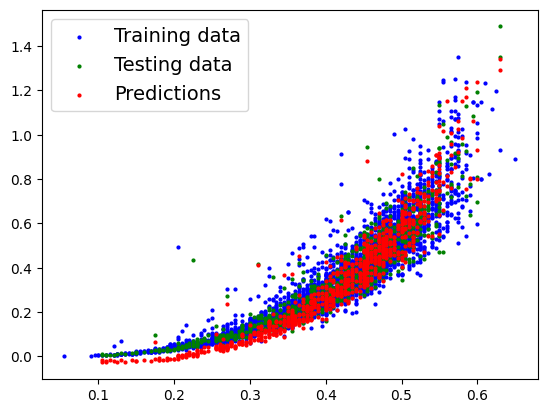

In [ ]:
# Turn on evaluation mode
linear.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = linear(X_test)

# Select the first feature from X_test for plotting, I had to add this as just running as is was breaking it because we had incompatible dims between x and y
# Make sure to also select the corresponding feature from X_train for the training data plot
plot_predictions(train_data=X_train[:, [0]],
                 test_data=X_test[:, [0]], # Select the first feature from X_test
                 predictions=y_preds);


Now that really nice. I have like around one more class period to finish this up? So I might attempt at making it multi layered just to try it out . I don't think adding more predictors will help our predictions at all just complicated it.